## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Preparación de los datos para clustering

---

En esta libreta se realizan las transforamciones sobre los datasets del escenario considerando su uso para los métodos de clusterización.

---

In [3]:
#Se importan las librerias a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----

##### Lectura de los datasets

Se parte de los mismos datasets con los que se realizó la integración anterior.

In [4]:
df_creditos = pd.read_csv("../../data/processed/datos_creditos_mc.csv", sep=";")
display(df_creditos.head(1))

df_tarjetas = pd.read_csv("../../data/processed/datos_tarjetas_mc.csv", sep=";")
display(df_tarjetas.head(1))

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


---
#### Aplicación de transformaciones

**Operaciones a realizar**

1. Selección de columnas
2. Filtrado de filas
3. Construcción de atributos
4. Integración de datasets
5. Formateo definitivo


----

Selección de datos

In [5]:
# Se establece qué columnas se eliminan

col_eliminar_creditos = []
col_eliminar_tarjetas = ['nivel_tarjeta']

# Se ejecuta la operación

df_creditos.drop(col_eliminar_creditos, inplace=True, axis=1)
df_tarjetas.drop(col_eliminar_tarjetas, inplace=True, axis=1)

In [6]:
print("Vista del dataset de datos de créditos:")
display(df_creditos.head(1))

print("Vista del dataset de datos de tarjetas:")
display(df_tarjetas.head(1))

Vista del dataset de datos de créditos:


,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


Vista del dataset de datos de tarjetas:


,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,24.0,2.0


Limpieza de los datos (filtrado a nivel de filas)

In [7]:
#Se puede definir una función para aplicar los cálculos
def regla_pct_ingresos_credito(row):
    pct_ingreso = row.pct_ingreso
    ingresos = row.ingresos
    
    if pct_ingreso > 0.5 and ingresos <= 20000:
        # Es un error, no cumple la regla definida
        return 'err'
    else:
        return 'ok'


# Se aplica la función para todos los elementos del dataset
regla_pct_ingresos = df_creditos.apply(lambda row: regla_pct_ingresos_credito(row), axis=1).rename("regla_pct_ingresos")

# Se unen los resultados al dataset inicial
df_creditos = pd.concat([df_creditos, regla_pct_ingresos], axis=1)
df_creditos.head(5)  

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago,regla_pct_ingresos
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y,ok
1,768805383.0,21,1000,2,5.0,PROPIA,9600,EDUCACIÓN,0.10,11.14,0,N,ok
2,818770008.0,25,5500,3,1.0,HIPOTECA,9600,SALUD,0.57,12.87,1,N,err
3,713982108.0,23,35000,2,4.0,ALQUILER,65500,SALUD,0.53,15.23,1,N,ok
4,710821833.0,24,35000,4,8.0,ALQUILER,54400,SALUD,0.55,14.27,1,Y,ok


In [8]:
#features insumo para el cálculo de la regla:
# pct_ingreso: porcentaje de los ingresos que representa el crédito solicitado
# situacion_vivienda: tipo de vivienda que posee la persona.

#Se puede definir una función para aplicar los cálculos
lista = ['HIPOTECA', 'ALQUILER', 'OTROS']

def regla_pct_ingresos_vivienda(row):
    pct_ingreso = row.pct_ingreso
    situacion_vivienda = row.situacion_vivienda
    
    if pct_ingreso > 0.6 and situacion_vivienda  in lista:
        # Es un error, no cumple la regla definida
        return 'err'
    else:
        return 'ok'


# Se aplica la función para todos los elementos del dataset
regla_pct_vivienda = df_creditos.apply(lambda row: regla_pct_ingresos_vivienda(row), axis=1).rename("regla_pct_vivienda")

# Se unen los resultados al dataset inicial
df_creditos = pd.concat([df_creditos, regla_pct_vivienda], axis=1)  

# Se visualizan los datos
print("Se visualizan las tuplas que no cumplen con la regla:\n")
display(df_creditos[df_creditos.regla_pct_vivienda == 'err'].head())


# Se verifica la cantidad de elementos
aux = df_creditos[df_creditos.regla_pct_vivienda == 'err']
print(f"Cantidad de filas que no cumplen la regla: {aux.shape[0]}")

Se visualizan las tuplas que no cumplen con la regla:



,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago,regla_pct_ingresos,regla_pct_vivienda
36,713962233.0,22,30000,2,1.0,ALQUILER,48000,EDUCACIÓN,0.63,18.39,1,N,ok,err
108,717929133.0,24,25000,3,2.0,ALQUILER,41000,MEJORAS_HOGAR,0.61,NaN,1,N,ok,err
493,711374283.0,23,22250,3,2.0,ALQUILER,35000,PAGO_DEUDAS,0.64,12.69,1,N,ok,err
535,717049533.0,22,21250,3,5.0,ALQUILER,31000,PAGO_DEUDAS,0.69,12.42,1,N,ok,err
571,709040508.0,21,15000,2,0.0,HIPOTECA,19500,EDUCACIÓN,0.77,9.64,1,N,err,err


Cantidad de filas que no cumplen la regla: 20


In [9]:
# Se filtran las filas con algún error detectado
print(f"Filas antes del filtro 1: {df_creditos.shape[0]}")

temp = df_creditos[df_creditos['edad'] < 90]

# Otro filtro posible: por la regla de negocio agregada

temp_c = temp[temp['regla_pct_ingresos'] == 'ok']

print(f"Filas después del filtro 1: {temp_c.shape[0]}")

#______________________________________________________________________
temp_d = temp_c[temp_c['regla_pct_vivienda'] != 'err']

print(f"Filas después del filtro 2: {temp_d.shape[0]}")

Filas antes del filtro 1: 10127
Filas después del filtro 1: 10108
Filas después del filtro 2: 10093


Integración de datos

In [18]:
df_integrado = pd.merge(temp_d, df_tarjetas, on='id_cliente', how='inner')
coincidencias = df_integrado.shape[0]

print(f"Filas del dataset integrado con los filtros realizados: {coincidencias}")

Filas del dataset integrado con los filtros realizados: 10093


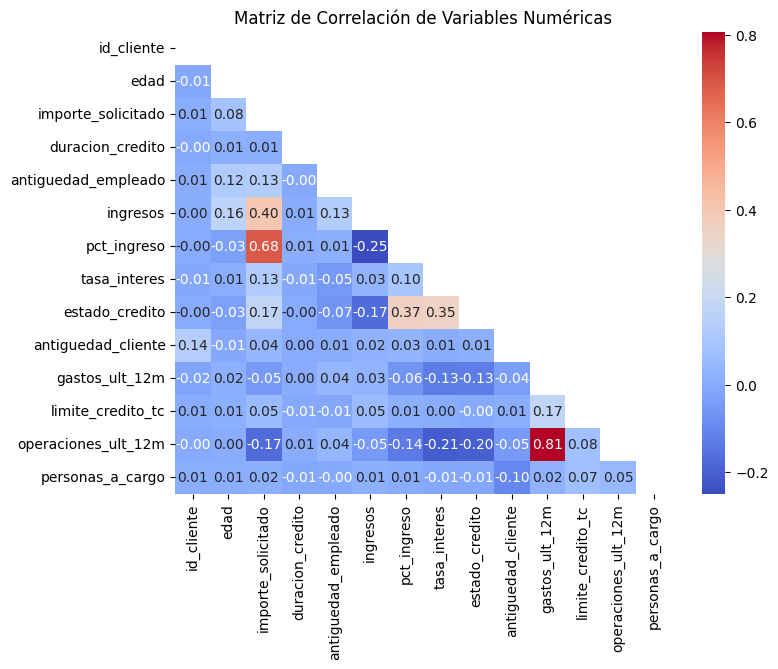

In [19]:
columnas_numericas = df_integrado.select_dtypes(include = [np.number])

matriz_corr = columnas_numericas.corr()
# Crear una máscara para la parte superior de la matriz
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar la matriz de correlación
sns.heatmap(matriz_corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar la figura
plt.show()

In [20]:
# Se establece qué columnas se eliminan

col_eliminar_integrado = ['operaciones_ult_12m', 'regla_pct_ingresos', 'regla_pct_vivienda', 'pct_ingreso']

# Se ejecuta la operación

df_integrado.drop(col_eliminar_integrado, inplace=True, axis=1)

In [21]:
df_integrado.columns

Index(['id_cliente', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'situacion_vivienda', 'ingresos',
       'objetivo_credito', 'tasa_interes', 'estado_credito', 'falta_pago',
       'antiguedad_cliente', 'estado_civil', 'estado_cliente',
       'gastos_ult_12m', 'genero', 'limite_credito_tc', 'nivel_educativo',
       'personas_a_cargo'],
      dtype='object')

In [22]:
print(f"Cantidad de columnas del dataset integrado: {df_integrado.shape[1]}")

Cantidad de columnas del dataset integrado: 19


#### Transformación de atributos

Observación general del dataset

In [23]:
df_integrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10093 entries, 0 to 10092
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10093 non-null  float64
 1   edad                 10093 non-null  int64  
 2   importe_solicitado   10093 non-null  int64  
 3   duracion_credito     10093 non-null  int64  
 4   antiguedad_empleado  9757 non-null   float64
 5   situacion_vivienda   10093 non-null  object 
 6   ingresos             10093 non-null  int64  
 7   objetivo_credito     10093 non-null  object 
 8   tasa_interes         9184 non-null   float64
 9   estado_credito       10093 non-null  int64  
 10  falta_pago           10093 non-null  object 
 11  antiguedad_cliente   10093 non-null  float64
 12  estado_civil         10093 non-null  object 
 13  estado_cliente       10093 non-null  object 
 14  gastos_ult_12m       10093 non-null  float64
 15  genero               10093 non-null 

##### Procesamiento de valores nulos

En este caso se van a filtrar (eliminar)

In [24]:
df_filtrado = df_integrado[(df_integrado['tasa_interes'].notnull()) & (df_integrado['antiguedad_empleado'].notnull())]
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8871 entries, 0 to 10092
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           8871 non-null   float64
 1   edad                 8871 non-null   int64  
 2   importe_solicitado   8871 non-null   int64  
 3   duracion_credito     8871 non-null   int64  
 4   antiguedad_empleado  8871 non-null   float64
 5   situacion_vivienda   8871 non-null   object 
 6   ingresos             8871 non-null   int64  
 7   objetivo_credito     8871 non-null   object 
 8   tasa_interes         8871 non-null   float64
 9   estado_credito       8871 non-null   int64  
 10  falta_pago           8871 non-null   object 
 11  antiguedad_cliente   8871 non-null   float64
 12  estado_civil         8871 non-null   object 
 13  estado_cliente       8871 non-null   object 
 14  gastos_ult_12m       8871 non-null   float64
 15  genero               8871 non-null   objec

##### Procesamiento de atributos nominales

Se realiza una binarización por aquellos métodos que no pueden operar con atributos no numéricos.

In [25]:
data = pd.get_dummies(df_filtrado)
data.head()

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,713061558.0,22,35000,3,123.0,59000,16.02,1,36.0,1088.0,...,True,False,False,True,False,False,False,False,True,False
1,768805383.0,21,1000,2,5.0,9600,11.14,0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
2,713982108.0,23,35000,2,4.0,65500,15.23,1,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
3,710821833.0,24,35000,4,8.0,54400,14.27,1,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
4,769911858.0,21,2500,2,2.0,9900,7.14,1,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False


Se exportan los resultados para poder utilizarlos en las operaciones de clustering

In [26]:
data.to_csv("../../data/final/datos_clusterizacion.csv", sep=';', index=False)

In [27]:
print(f"Cantidad de filas del dataset integrado: {data.shape[0]}")
print(f"Cantidad de columnas del dataset integrado: {data.shape[1]}")

Cantidad de filas del dataset integrado: 8871
Cantidad de columnas del dataset integrado: 38
